In [0]:
import tensorflow as tf

!pip install mnist

from sklearn import datasets

import numpy as np
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()




# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [0]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

TypeError: ignored

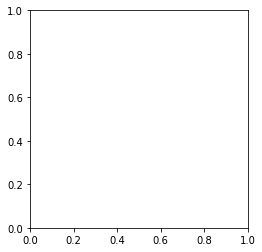

In [0]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(y_train[1])
plt.show

In [0]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

60010


<function matplotlib.pyplot.show>

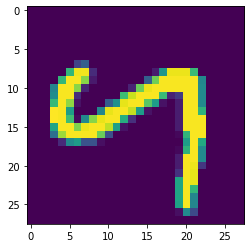

In [0]:
#for train data
print(len(X_train)+10)
for t in range(len(X_train)):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

#for test data  
for t in range(len(X_test)):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show



8


<function matplotlib.pyplot.show>

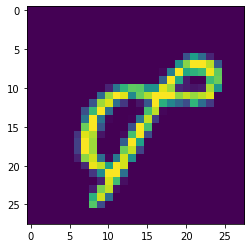

In [0]:

m = X_train[len(X_train)-1]
print(y_train[len(X_train)-1])
plt.imshow(m)
plt.show

In [0]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [0]:
!pip install tensorflow==1.14.0
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils
from keras.callbacks import EarlyStopping

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Conv2D(20, (3, 3), padding="same", input_shape=(30, 30, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(48, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(62, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 48)        8688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 48)        192       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 48)          0         
_

In [0]:
print(model.summary())
estop = EarlyStopping(patience=10, mode='min', min_delta=0.001, monitor='val_loss')
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=100,callbacks=[estop])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 48)        8688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 48)        192       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)             

In [0]:
model.save("mymodel.h5")
from google.colab import files
files.download("/content/mymodel.h5")
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 98.91%


2
prediction: [2]


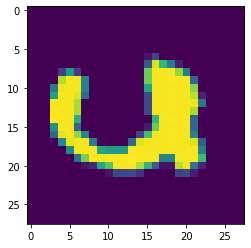

In [0]:
m = X_test[258].reshape(28,28)
print(y_test[258])
plt.imshow(m)
plt.show
print('prediction: '+str(model.predict_classes(X_test[258].reshape(1,784))))

## Saving the model

In [0]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

    
model.save_weights("model.h5")
files.download("/content/model.h5")
